#### Github link

#### https://github.com/dhruv1121/Programming-for-Data-Science

### Programming for Data Science: Assignment 1

#### Import Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1)	Load in the appropriate csv file as a pandas dataframe (Batting.csv)

In [36]:
#Loading the data
df = pd.read_csv('/Users/dhruvjoshi/Desktop/PFDS/Batting.csv')

#### 2)	Print out the dimensions and info about the dataframe you just created

In [37]:
df.shape

(102816, 25)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

#### 3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [39]:
#create a new dataframe where playerID and yearID are columns and HRTotal has sum of home runs
df3 = df[['playerID','yearID','HR']].groupby(['playerID','yearID'], as_index=False).agg({'HR':['sum']}).rename(columns={"HR": "HRTotal"})
#dropping the level 1 from multilevel columns
df3.columns = df3.columns.droplevel(1)
#finding length of series of the unique players having HR greater than 40
len(df3.query('HRTotal>=40').playerID.unique())

142

#### 4)	How many players have hit more than 600 HRs for their career? (Dataframe)

In [40]:
#create a new dataframe where playerID and HRTotal has sum of home runs
df4=df[['playerID','HR']].groupby(['playerID']).agg({'HR':['sum']}).rename(columns={"HR": "Total"})
#drop the level 1 from multilevel columns
df4.columns = df4.columns.droplevel(1)
#finding dataframe of the players having greater than 600 HRs in sorted manner
df4.query('Total>=600').sort_values(by='Total',ascending=False)

,Total
playerID,
bondsba01,762
aaronha01,755
ruthba01,714
rodrial01,696
mayswi01,660
griffke02,630
thomeji01,612
sosasa01,609


#### 5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [41]:
#create a new dataframe having playerID, yearID,2B,3B,H,HR and total has of each 2B,3B,H,HR using group by and sum function
df5 = df[['playerID','yearID','2B','3B','H','HR']].groupby(['playerID','yearID'],as_index = False).agg({'2B':['sum'],'3B':['sum'],'H':['sum'],'HR':['sum']}).rename(columns={"2B": "2BTotal","3B": "3BTotal","H": "HTotal","HR": "HRTotal"})
#drop the level 1 from multilevel columns
df5.columns = df5.columns.droplevel(1)
#find the lengh of series of unique players match the criterions
len(df5[(df5['2BTotal'] >=40) & (df5['3BTotal'] >=10) & (df5['HTotal'] >=200) & (df5['HRTotal'] >=30) ]['playerID'].unique())

11

#### 6)	How many players have had 100 or more SBs in a season? (Dataframe)

In [42]:
#create a new dataframe having playerID, yearID, and SBs sum
df6 = df[['playerID','yearID','SB']].groupby(['playerID','yearID'],as_index = False).agg({'SB':['sum']}).rename(columns={"SB": "SBTotal"})
#drop the level 1 from multilevel columns
df6.columns = df6.columns.droplevel(1)
#filter the dataframe to match the criterion
df6[df6['SBTotal'] >=100]

,playerID,yearID,SBTotal
9713,brocklo01,1974,118.0
10331,brownpe01,1887,103.0
10364,brownto01,1891,106.0
16351,colemvi01,1985,110.0
16352,colemvi01,1986,107.0
16353,colemvi01,1987,109.0
16703,comisch01,1887,117.0
27187,fogarji01,1887,102.0
34649,hamilbi01,1889,111.0
34650,hamilbi01,1890,102.0


#### 7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [43]:
#create a new dataframe with playerID and HRTotal has sum of home runs and yearID between 1960 to 1969 inclusive
df7= df[(df.yearID>=1960) & (df.yearID <1970)][['playerID','HR']].groupby(['playerID'], as_index = False).agg({'HR':['sum']}).rename(columns = {'HR':'HRTotal'})
df7.columns = df7.columns.droplevel(1)
#find dataframe of the players having greater than 200 HRs in a sorted manner
df7[df7['HRTotal'] >=200].sort_values(by='HRTotal',ascending =False)

,playerID,HRTotal
856,killeha01,393
0,aaronha01,375
1044,mayswi01,350
1372,robinfr02,316
1057,mccovwi01,300
751,howarfr01,288
279,cashno01,278
70,bankser01,269
1009,mantlmi01,256
283,cepedor01,254


#### 8)	Who has hit the most HRs in history? (Dataframe)

In [44]:
#create a data frame with sum of homeruns and playerID
df8=df[['playerID','HR']].groupby(['playerID']).agg({'HR':['sum']}).rename(columns={"HR": "Total"})
df8.columns = df8.columns.droplevel(1)
#find max of the total Home Runs
df8[df8['Total']==df8['Total'].max()]

,Total
playerID,
bondsba01,762


#### 9)	Who had the most hits in the 1970s? (Dataframe)

In [45]:
#create a dataframe with Hits in yearID in 1970 to 1979 inclusive
df9= df[(df.yearID >=1970) & (df.yearID <1980)][['playerID','H']].groupby(['playerID'], as_index = False).agg({'H':['sum']}).rename(columns = {'H':'HTotal'})
df9.columns = df9.columns.droplevel(1)
#find the max Hits
df9[df9['HTotal']==df9['HTotal'].max()]

,playerID,HTotal
1639,rosepe01,2045


#### 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [46]:
df10 = df[df.yearID == 1977][['playerID','H','BB','IBB','AB','SF','SH']].groupby(['playerID'],as_index = False).agg({'H':['sum'],'BB':['sum'],'IBB':['sum'],'AB':['sum'],'SF':['sum'],'SH':['sum']})
df10.columns = df10.columns.droplevel(1)
#Calculate OBP in a new column
df10['OBP'] = (df10.H + df10.BB + df10.IBB+df10.SF + df10.SH)/(df10.AB)
#Calculate PA in new column
df10['PA'] = (df10.AB + df10.BB + df10.IBB +df10.SF + df10.SH)
#filter the data and sort and print only top 5
df10[df10.PA >=500].sort_values(by=['OBP'], ascending=False)[:5]

,playerID,H,BB,IBB,AB,SF,SH,OBP,PA
745,singlke01,176,107,13.0,536,6.0,0.0,0.563433,662.0
752,smithre06,150,104,11.0,488,7.0,1.0,0.559426,611.0
800,tenacge01,102,125,10.0,437,4.0,2.0,0.556064,578.0
334,hargrmi01,160,103,7.0,525,6.0,8.0,0.540952,649.0
135,carewro01,239,69,15.0,616,5.0,1.0,0.534091,706.0


#### 11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [47]:
df11 = df[df.yearID == 2013][['playerID','H','BB','IBB','AB','SF','SH']].groupby(['playerID'],as_index = False).agg({'H':['sum'],'BB':['sum'],'IBB':['sum'],'AB':['sum'],'SF':['sum'],'SH':['sum']})
df11.columns = df11.columns.droplevel(1)
df11['AVG'] = (df11.H)/(df11.AB)
df11['PA'] = (df11.AB + df11.BB + df11.IBB +df11.SF + df11.SH)
df11[df11.PA >=300].sort_values(by=['AVG'], ascending=False)[:8]

,playerID,H,BB,IBB,AB,SF,SH,AVG,PA
167,cabremi01,193,90,19.0,555,2.0,0.0,0.347748,666.0
980,ramirha01,105,27,3.0,304,2.0,0.0,0.345395,336.0
269,cuddymi01,162,46,5.0,489,3.0,0.0,0.331288,543.0
759,mauerjo01,144,61,7.0,445,2.0,0.0,0.323596,515.0
1196,troutmi01,190,110,10.0,589,8.0,0.0,0.322581,717.0
595,johnsch05,165,29,5.0,514,2.0,0.0,0.321012,550.0
398,freemfr01,176,66,10.0,551,5.0,0.0,0.319419,632.0
962,puigya01,122,36,6.0,382,3.0,0.0,0.319372,427.0


#### 12)	Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [48]:
df12 = df[['playerID','yearID','H']].groupby(['playerID','yearID'] , as_index = False).agg({'H':['sum']}).rename(columns={'H':'HTotal'})
df12.columns = df12.columns.droplevel(1)
df12 = df12[df12.yearID.isin([1940,1941, 1942, 1943, 1944,1945,1946,1947,1948,1948])]
#compare the max value each year idx will be true where value is max
idx = df12.groupby(['yearID'])['HTotal'].transform(max) == df12['HTotal']
#print dataframe where idx is true (max value)
df12[idx].sort_values(['yearID'])

,playerID,yearID,HTotal
18085,cramedo01,1940,200
55248,mccosba01,1940,200
69858,radclri01,1940,200
86576,travice01,1941,218
67187,peskyjo01,1942,205
61219,musiast01,1943,220
82520,stirnsn01,1944,205
39285,holmeto01,1945,224
61221,musiast01,1946,228
67189,peskyjo01,1947,207


#### 13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [49]:
df13= df[['playerID','yearID','H']].groupby(['playerID','yearID'], as_index = False).agg({'H':['sum']})
df13.columns = df13.columns.droplevel(1)
idx13 = df13.groupby(['yearID'])['H'].transform(max) == df13['H']
df13[idx13 & (df13.playerID == df13[idx13]['playerID'].value_counts().idxmax())].sort_values(by=['yearID'])

,playerID,yearID,H
83724,suzukic01,2001,242
83727,suzukic01,2004,262
83729,suzukic01,2006,224
83730,suzukic01,2007,238
83731,suzukic01,2008,213
83732,suzukic01,2009,225
83733,suzukic01,2010,214


In [50]:
df13[idx13]['playerID'].value_counts().max()

7

#### 14)	Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [51]:
df14= df[['playerID','G']].groupby(['playerID'], as_index = False).agg({'G':['sum']}).rename(columns ={"G":"Games"})
df14.columns = df14.columns.droplevel(1)
df14.sort_values(by=['Games'], ascending = False, inplace = True)
df14[:5]

,playerID,Games
14719,rosepe01,3562
18728,yastrca01,3308
1,aaronha01,3298
7383,henderi01,3081
3155,cobbty01,3035


#### 15)	How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [52]:
df15 = df[['playerID','H','HR']].groupby(['playerID'],as_index = False).agg({'H':['sum'],'HR':['sum']}).rename(columns={"H": "HTotal","HR": "HRTotal"})
df15.columns = df15.columns.droplevel(1)
len(df15[(df15['HTotal'] >=3000) & (df15['HRTotal'] >=500) ]['playerID'].unique())

5

#### 16)	 How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [53]:
df[df.yearID==1988]['HR'].sum()

3180

#### 17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [54]:
df17 = df[df.playerID == 'boggswa01'][['yearID','H','AB']].groupby(['yearID'],as_index = False).agg({'H':['sum'],'AB':['sum']})
df17.columns = df17.columns.droplevel(1)
df17['AVG'] = (df17.H)/(df17.AB)
df17[df17.AB >=500].sort_values(by=['AVG'], ascending=False)[:3]

,yearID,H,AB,AVG
3,1985,240,653,0.367534
6,1988,214,584,0.366438
5,1987,200,551,0.362976


#### 18)	Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [55]:
df18 = df[df.yearID == 1995][['playerID','H','BB','IBB','AB','SF','SH']].groupby(['playerID'],as_index = False).agg({'H':['sum'],'BB':['sum'],'IBB':['sum'],'AB':['sum'],'SF':['sum'],'SH':['sum']})
df18.columns = df18.columns.droplevel(1)
df18['OBP'] = (df18.H + df18.BB + df18.IBB+df18.SF + df18.SH)/(df18.AB)
df18['PA'] = (df18.AB + df18.BB + df18.IBB +df18.SF + df18.SH)
df18[df18.PA >=400].sort_values(by=['OBP'], ascending=False).head()

,playerID,H,BB,IBB,AB,SF,SH,OBP,PA
1002,thomafr04,152,136,29.0,493,12.0,0.0,0.667343,670.0
628,martied01,182,116,19.0,511,4.0,0.0,0.628180,650.0
659,mcgwima01,87,88,5.0,317,6.0,0.0,0.586751,416.0
107,bondsba01,149,120,22.0,506,4.0,0.0,0.583004,652.0
235,davisch01,135,89,12.0,424,9.0,0.0,0.577830,534.0


#### 19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [56]:
df19 = df[df['yearID'].isin([1922, 1925, 1926, 1928])][['playerID','yearID','3B']].groupby(['playerID','yearID'], as_index= False).agg({'3B':['sum']})
df19.columns = df19.columns.droplevel(1)
idx19 = df19.groupby(['yearID'])['3B'].transform(max) == df19['3B']
df19[idx19].sort_values(['yearID'])

,playerID,yearID,3B
390,daubeja01,1922,22
381,cuyleki01,1925,26
1885,wanerpa01,1926,22
322,combsea01,1928,21


#### 20)	How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [57]:
df20 = df[['playerID','yearID','HR','SB']].groupby(['playerID','yearID'],as_index = False).agg({'HR':['sum'],'SB':['sum']})
df20.columns = df20.columns.droplevel(1)
df20[(df20.HR >=30) & (df20.SB >=30)]['playerID'].nunique()

38

#### 21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [58]:
df21 = df[df.yearID == 1986][['playerID','H','BB','IBB','AB','SF','SH']].groupby(['playerID'],as_index = False).agg({'H':['sum'],'BB':['sum'],'IBB':['sum'],'AB':['sum'],'SF':['sum'],'SH':['sum']})
df21.columns = df21.columns.droplevel(1)
df21['OBP'] = (df21.H + df21.BB + df21.IBB+df21.SF + df21.SH)/(df21.AB)
df21['PA'] = (df21.AB + df21.BB + df21.IBB +df21.SF + df21.SH)
df21 = df21[df21.PA >=400]
df21[df21.OBP == df21.OBP.max()]

,playerID,H,BB,IBB,AB,SF,SH,OBP,PA
78,boggswa01,207,105,14.0,580,4.0,4.0,0.575862,707.0


#### 22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [59]:
df22 = df[(df.yearID == 1997) & (df.lgID == 'NL')][['playerID','H','BB','IBB','AB','SF','SH']].groupby(['playerID'],as_index = False).agg({'H':['sum'],'BB':['sum'],'IBB':['sum'],'AB':['sum'],'SF':['sum'],'SH':['sum']})
df22.columns = df22.columns.droplevel(1)
df22['OBP'] = (df22.H + df22.BB + df22.IBB+df22.SF + df22.SH)/(df22.AB)
df22['PA'] = (df22.AB + df22.BB + df22.IBB +df22.SF + df22.SH)
df22 = df22[df22.PA >=400]
df22[df22.OBP == df22.OBP.max()]

,playerID,H,BB,IBB,AB,SF,SH,OBP,PA
60,bondsba01,155,145,34.0,532,5.0,0.0,0.637218,716.0


#### 23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [60]:
df23 = df[(df.yearID == 2012)][['playerID','HR','BB','IBB','AB','SF','SH']].groupby(['playerID'],as_index = False).agg({'HR':['sum'],'BB':['sum'],'IBB':['sum'],'AB':['sum'],'SF':['sum'],'SH':['sum']})
df23.columns = df23.columns.droplevel(1)
df23['PA'] = (df23.AB + df23.BB + df23.IBB +df23.SF + df23.SH)
df23 = df23[df23.PA >=500]
df23[df23.HR > df23.HR.mean()]

,playerID,HR,BB,IBB,AB,SF,SH,PA
20,alvarpe01,30,57,6.0,525,3.0,0.0,591.0
82,beltrad01,36,36,8.0,604,9.0,0.0,657.0
83,beltrca01,32,65,15.0,547,4.0,1.0,632.0
119,braunry02,41,63,15.0,598,5.0,0.0,681.0
130,bruceja01,34,62,11.0,560,7.0,0.0,640.0
148,butlebi03,29,54,9.0,614,4.0,0.0,681.0
156,cabremi01,44,66,17.0,622,6.0,0.0,711.0
165,canoro01,33,61,10.0,627,2.0,0.0,700.0
201,cespeyo01,23,43,5.0,487,3.0,0.0,538.0
254,craigal01,22,37,1.0,469,7.0,0.0,514.0


#### 24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [61]:
df24 = df[['playerID','yearID','HR']].groupby(['playerID','yearID'], as_index=False).agg({'HR':['sum']}).rename(columns={"HR": "HRTotal"})
df24.columns = df24.columns.droplevel(1)
df24 = df24.query('HRTotal>=50')
df24 = pd.merge(df24,df[['playerID','birthYear']],on='playerID')
df24['age'] = df24.yearID - df24.birthYear
df24[(df24.yearID - df24.birthYear) == 23].drop_duplicates()

,playerID,yearID,HRTotal,birthYear,age
92,fieldpr01,2007,50,1984,23


#### 25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [62]:
#First Calculate the cumulative sum of HR year and player wise
df25 = df[['playerID','yearID','HR']].groupby(['playerID','yearID']).sum().fillna(0).groupby(level=0).cumsum().rename(columns={"HR": "HR_cum_sum"})
df25.reset_index(inplace=True)
#Calculate the minimum year when the player scored 300 or more
df25 = df25[df25.HR_cum_sum >=300]
idx25 = df25.groupby(['playerID'])['HR_cum_sum'].transform(min) == df25['HR_cum_sum']
df25 = df25[idx25]
#merge to original dataframe to get the birthyear and calculate the age
df25 = pd.merge(df25,df[['playerID','birthYear']].drop_duplicates(),on='playerID',how='left')
df25['age'] = df25.yearID - df25.birthYear
df25.sort_values(by=['age','yearID'],ascending=True).head()

,playerID,yearID,HR_cum_sum,birthYear,age
46,foxxji01,1935,302,1907,28
104,ottme01,1937,306,1909,28
117,rodrial01,2003,345,1975,28
72,jonesan01,2005,301,1977,28
111,pujolal01,2008,319,1980,28


#### BONUS:  
## Graph total HRs per season using bar graph

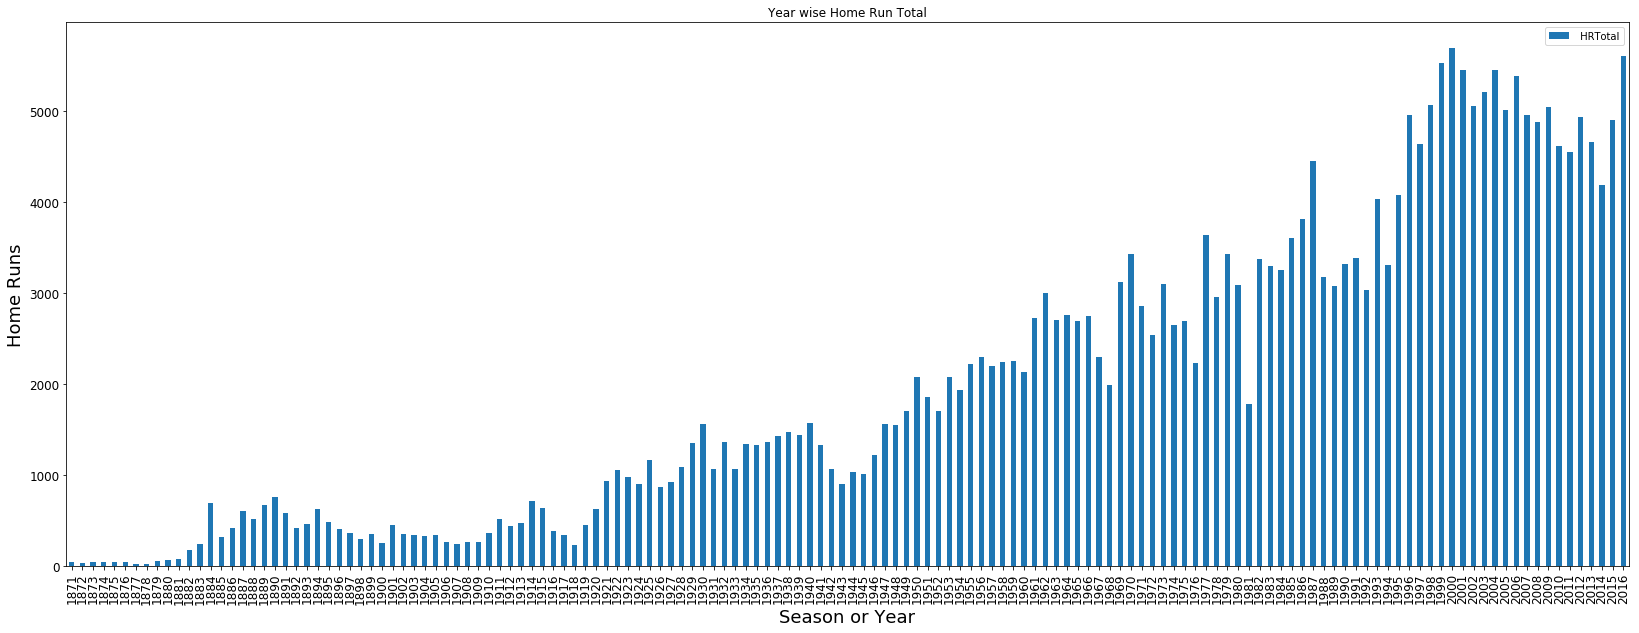

In [63]:
import matplotlib.pyplot as plt
dfB1 = df[["yearID","HR"]].groupby(["yearID"]).agg({'HR':['sum']}).rename(columns={"HR": " HRTotal"})
dfB1.columns = dfB1.columns.droplevel(1)
dfB1.plot(kind='bar',title ="Year wise Home Run Total",figsize=(28,10),legend=True, fontsize=12)
plt.xlabel('Season or Year',fontsize=18)
plt.ylabel('Home Runs',fontsize=18)
plt.show()

## Using a line graph please graph the average HRs per AB (think about this) per season

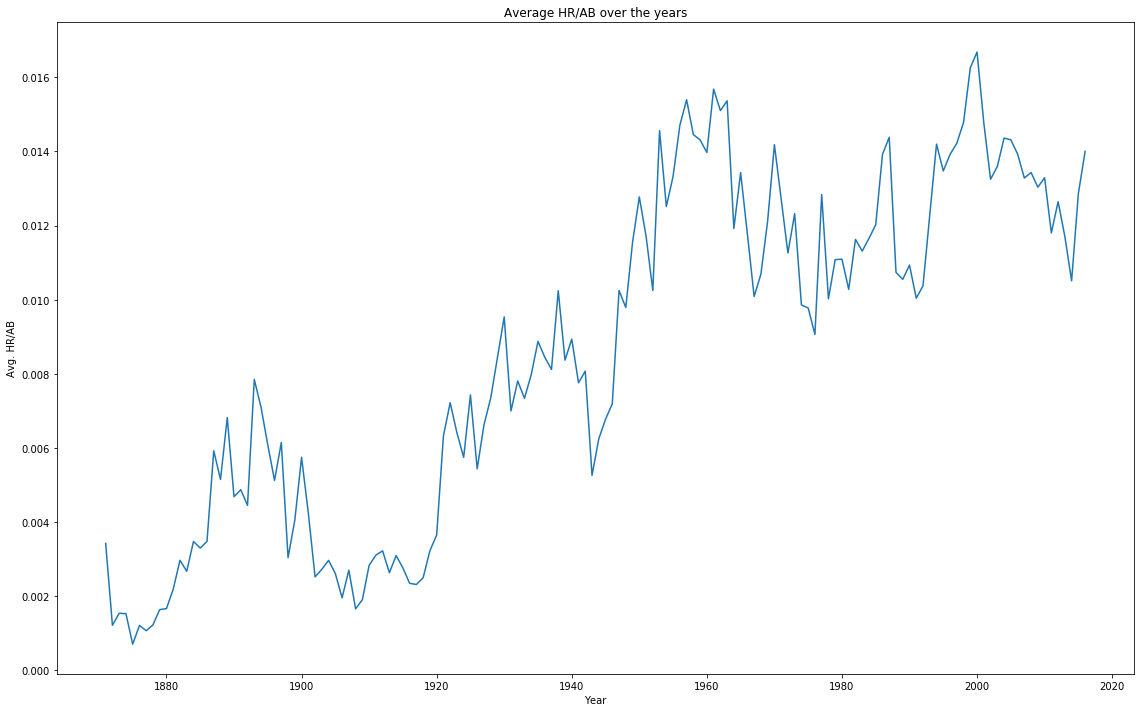

In [64]:
#generate a dataframe for HR/AB for each player for every season
HR_AB = df.pivot_table(values=['HR','AB'], index=['playerID','yearID'],aggfunc='sum').reset_index()
HR_AB['HR_per_AB']=HR_AB['HR']/HR_AB['AB']
#fill 0 inplace of NaN generated by 0/0 instances
HR_AB.fillna(value=0,inplace=True)
avg_HR_AB = HR_AB.pivot_table(values=['HR_per_AB'], index='yearID',aggfunc='mean').reset_index()
#line-graph
fig, axes = plt.subplots(figsize=(16,10))
axes.plot(avg_HR_AB['yearID'],avg_HR_AB['HR_per_AB'])
axes.set_ylabel("Avg. HR/AB")
axes.set_xlabel("Year")
axes.set_title("Average HR/AB over the years")
fig.tight_layout()